# **Plotting Residuals**

This notebook explains how to plot residuals as time increases. As a bash script called *'Allrun'* will be executed, this python code will simultaneously executed in order to plot residuals for each **SIMPLE** residual limit value. In this case, we do not need to execute the python again. However, we should export this notebook to **'PlotResiduals.py'** file and copy it to each case folder that we would like to simulate.

In [1]:
#!/usr/bin/env python
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
#mpl.rc('text', usetex=True)

## **1. Importing Related Variables from *'Allrun'* Shell Script**

In order to reduce the amount of code lines, we need to import some related values (e.g. model name, yplus, and residual limits) from the *'Allrun'* script. Regarding *'yp'* variable, it will be an integer value if the original *'yp'* does not contain any periods (i.e. it is not decimal), and vice versa. The list *'res_list'* contains all the different residual limits for **SIMPLE** residual control.

In [2]:
# These lines that are commented out for the purpose of testing in jupyter notebook.
'''
model = "kOmegaSST"
yp = 1
res_list = ['1e-3', '1e-4']
'''
model = os.environ["model"]
yp = os.environ["yp"]
if (yp.find('.') == -1):
    yp = int(os.environ["yp"])
else:
    yp = float(os.environ["yp"])
res_list = os.getenv('res_list').split(',')
res_list = res_list[1:]

'\nmodel = os.environ["model"]\nyp = os.environ["yp"]\nif (yp.find(\'.\') == -1):\n    yp = int(os.environ["yp"])\nelse:\n    yp = float(os.environ["yp"])\nres_list = os.getenv(\'res_list\').split(\',\')\nres_list = res_list[1:]\n'

## **2. Load Data**
A \*.*csv* file that is created during simulation is loaded to python. For this case, we need to calculate with various residual limits, and hence *'solverInfo_path'* should be a list that contains each residual limit value. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided. Here, only values of the first residual (1e-3) are checked.

In [3]:
# This line that is commented out for the purpose of testing in jupyter notebook.
#solverInfo_path = ['../run/turbulentFlatPlate1/yplus_{}/solverInfo_{}_{}_{}.csv'.format(str(yp), model, str(yp), res_list[i]) for i in range(len(res_list))]
solverInfo_path = ['yplus_{}/solverInfo_{}_{}_{}.csv'.format(str(yp), model, str(yp), res_list[i]) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[j], delim_whitespace=True, skiprows = 1) for j in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.053604,2,1.000000,0.091371,1,False,GAMG,1.000000,0.078214,16,True
1,2,smoothSolver,0.039936,0.003989,3,0.197585,0.005002,1,False,GAMG,0.002437,0.000185,7,True
2,3,smoothSolver,0.014343,0.000915,5,0.098631,0.003412,1,False,GAMG,0.003718,0.000330,5,True
3,4,smoothSolver,0.008090,0.000651,5,0.063327,0.002458,1,False,GAMG,0.004031,0.000304,5,True
4,5,smoothSolver,0.005590,0.000505,5,0.045845,0.001789,1,False,GAMG,0.004191,0.000289,4,True


## **3. Import of Initial Residual for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'***

In \*.*csv* file of *'solverInfo'*, all the residuals for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'* are already calculated. Therefore, these values need to be imported to python. All the values except time should be lists as they are calculated for various **SIMPLE** residual limits.

In [4]:
Ux_init_res = [solverInfo_data[k]['Ux_initial'] for k in range(len(res_list))]
Uy_init_res = [solverInfo_data[l]['Uy_initial'] for l in range(len(res_list))]
p_init_res = [solverInfo_data[m]['p_initial'] for m in range(len(res_list))]
t = solverInfo_data[0]['Time']

## **4. Plot**

All the initial residuals are plotted as the time step increases. Since we execute this code in the shell script which contains loops for several yplus values, graphs for each case will be created in the case folder as a \*.*pdf* format. However, since observing of convergence behavior is the purpose of this notebook, it would be better that graphs are separated by each **SIMPLE** residual limits, unlike plotting skin friction.

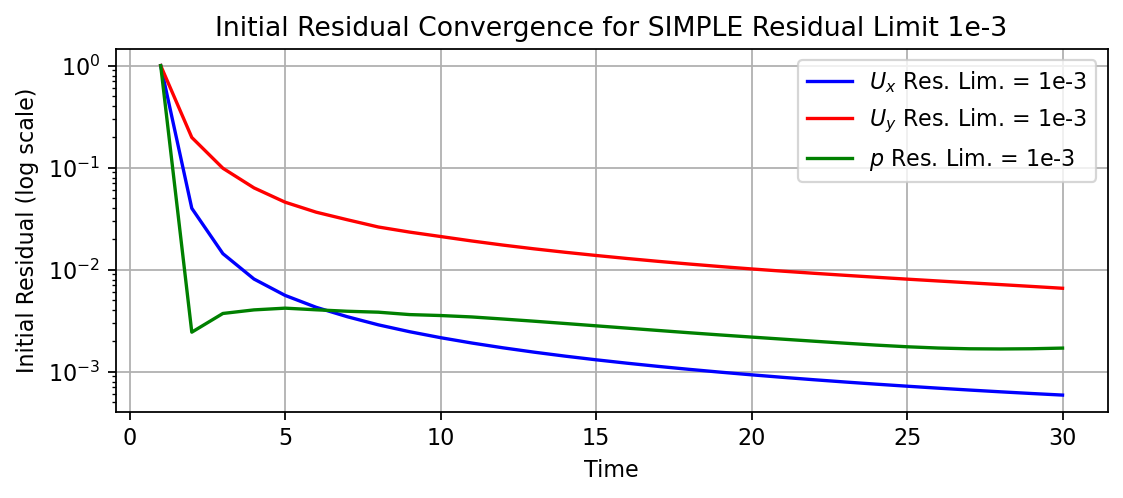

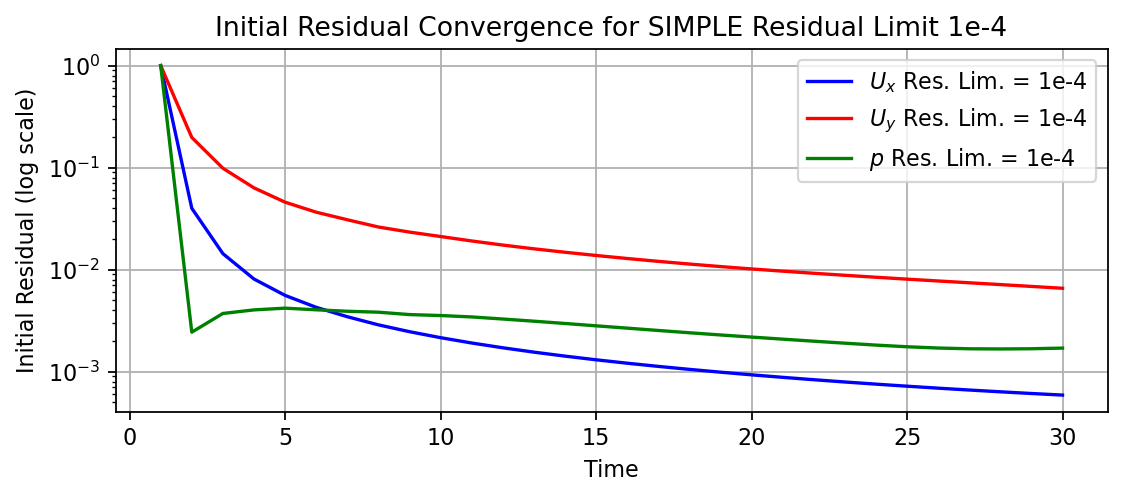

In [5]:
for n in range(len(res_list)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.yscale("log")
    plt.grid()
    plt.title("Initial Residual Convergence for SIMPLE Residual Limit {}".format(res_list[n]))
    ax.set_xlabel("Time")
    ax.set_ylabel("Initial Residual (log scale)")
    ax.plot(t, Ux_init_res[n], color = 'b', label = "$U_x$ Res. Lim. = {}".format(res_list[n]))
    ax.plot(t, Uy_init_res[n], color = 'r', label = "$U_y$ Res. Lim. = {}".format(res_list[n]))
    ax.plot(t, p_init_res[n], color = 'g', label = "$p$ Res. Lim. = {}".format(res_list[n]))
    ax.legend()
    plt.savefig("yplus_{}/solverInfo_{}_{}_{}.pdf".format(str(yp), model, str(yp), res_list[n]), bbox_inches="tight")